In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
gpus = tf.config.list_physical_devices("GPU")
tf.config.set_visible_devices(gpus[0],"GPU")
tf.config.experimental.set_memory_growth(gpus[0],True)
print("Using:", tf.config.experimental.get_device_details(gpus[0]).get("device_name"))


2026-01-15 12:44:36.730808: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using: NVIDIA GeForce RTX 3060


I0000 00:00:1768477479.915067    9514 gpu_device.cc:2411] Ignoring visible gpu device (device: 1, name: Quadro M1200, pci bus id: 0000:01:00.0, compute capability: 5.0) with core count: 5. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.


In [2]:
# check size image and some of dataset
path_data_train ="/home/tuanh/projet/DeepDetect/ddata/train"
path_data_test ="/home/tuanh/projet/DeepDetect/ddata/test"
size_train = 0 
size_test = 0
for files in os.listdir(path_data_train):
    size_train+=len(os.listdir(os.path.join(path_data_train,files)))
for files in os.listdir(path_data_test):
    size_test+=len(os.listdir(os.path.join(path_data_test,files)))
print(size_train)
print(size_test)


FileNotFoundError: [Errno 2] No such file or directory: '/home/tuanh/projet/DeepDetect/ddata/train'

In [3]:
# move all data in same files et resplit after
# 0 -> fake :1-> humain
import shutil, random
from pathlib import Path
path_fake_file = Path("/home/tuanh/projet/DeepDetect/data/0")

path_real_file = Path("/home/tuanh/projet/DeepDetect/data/1")
# path_fake_file.mkdir(parents=True,exist_ok=True)
# path_real_file.mkdir(parents=True,exist_ok=True)
# path_data_src = [path_data_test,path_data_train]
# image_real = 0
# image_fake = 0 
# # copy image_real to new file
# for files in  path_data_src:
#     path_src = Path(files +"/real")
#     for image in path_src.iterdir():
#         shutil.copy2(image,path_real_file/image.name)
#         image_real+=1
# # samething to fake_img
# for files in  path_data_src:
#     path_src = Path(files +"/fake")
#     for image in path_src.iterdir():
#         shutil.copy2(image,path_fake_file/image.name)
#         image_fake+=1
# print("img total:", image_fake+image_real)
# print("img fake : ", image_fake)
# print("img real :", image_real)

In [4]:
img_path = next(path_fake_file.iterdir())
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
print(img.shape)

img_path = next(path_real_file.iterdir())
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
print(img.shape)

img_path_fake =np.array(list(path_fake_file.iterdir()))[np.random.randint(low = 0, high = 50000,size= 3)]
img_path_real =np.array(list(path_real_file.iterdir()))[np.random.randint(low = 0, high = 50000,size= 3)]


(256, 256, 3)
(256, 256, 3)


all img size 256x256

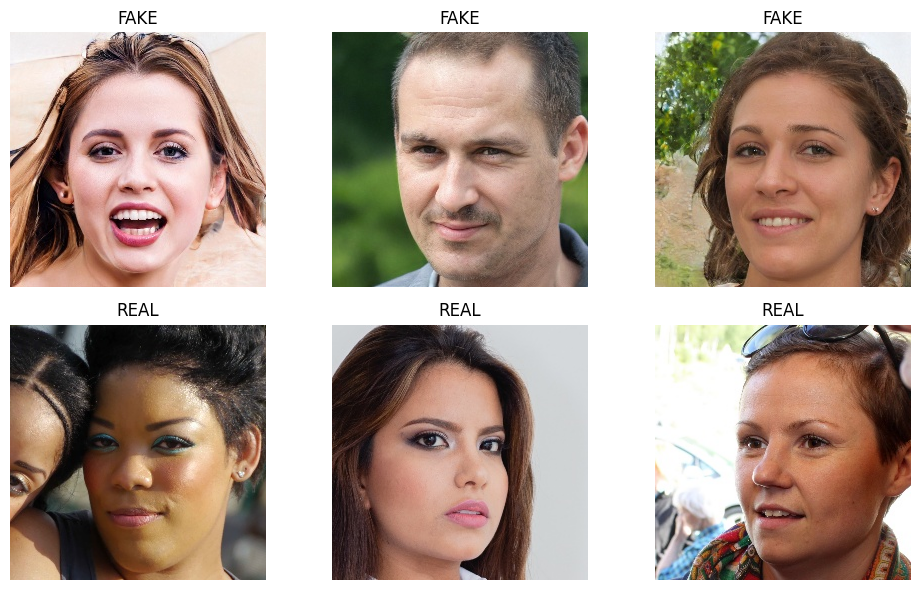

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i in range(2):
    for j in range(3):
        if i == 0:
            img_path = img_path_fake[j]
            title = "FAKE"
        else:
            img_path = img_path_real[j]
            title = "REAL"

        img = plt.imread(img_path)
        # print(img.shape)
        axs[i, j].imshow(img)
        axs[i, j].set_title(title)
        axs[i, j].axis("off")

plt.tight_layout()
plt.show()


In [6]:
imgs_fake = np.array(list(path_fake_file.iterdir()))
img_real =  np.array(list(path_real_file.iterdir()))

In [ ]:
# np.zeros((len(imgs_fake,)),dtype = "int")
# np.ones((len(img_real,)),dtype = "int")

array([0, 0, 0, ..., 0, 0, 0], shape=(51993,))

In [7]:
X =np.concatenate((imgs_fake,img_real),axis=0)
Y =np.concatenate((np.zeros((len(imgs_fake,)),dtype = "int"),np.ones((len(img_real,)),dtype = "int")),axis=0)

In [8]:
X.shape
X[1]

PosixPath('/home/tuanh/projet/DeepDetect/data/0/fake_033423.jpg')

In [9]:
Y.shape

(112185,)

In [1]:
# pip install -U scikit-learn

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size= 0.1,shuffle=True,random_state=42,stratify=Y)

In [14]:

X_train[0]

PosixPath('/home/tuanh/projet/DeepDetect/data/0/fake_047383.jpg')

In [15]:

print(np.bincount(y_train))
print(np.bincount(y_test))

[46793 54173]
[5200 6019]


In [16]:
def copy_images(X, y, split_dir):
    split_dir = Path(split_dir)

    for img_path, label in zip(X, y):
        img_path = Path(img_path)

        class_dir = split_dir / str(label)
        class_dir.mkdir(parents=True, exist_ok=True)

        dst = class_dir / img_path.name
        shutil.copy2(img_path, dst)

copy_images(
    X_train,
    y_train,
    "dataset/train"
)

copy_images(
    X_test,
    y_test,
    "dataset/test"
)


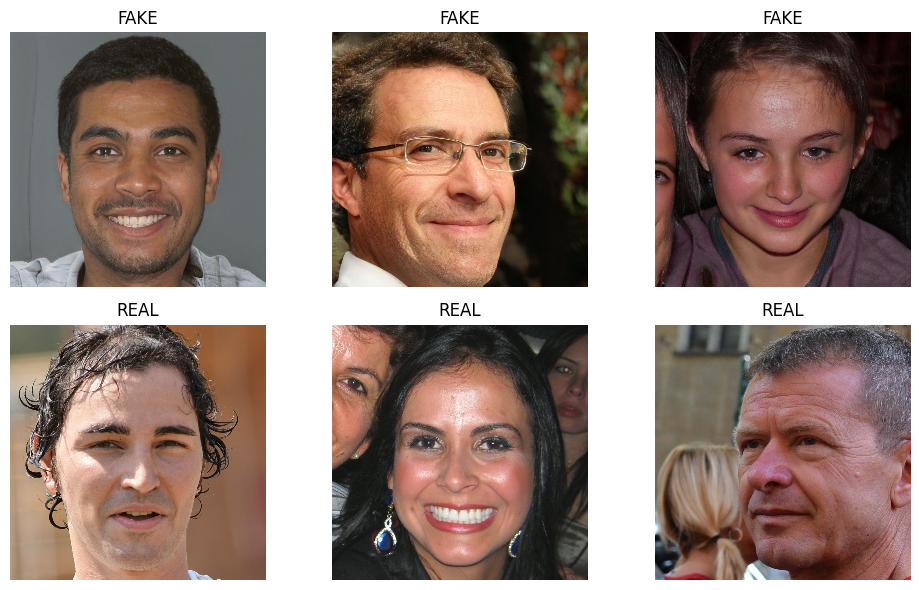

In [28]:
path_fake_file = Path("/home/tuanh/projet/DeepDetect/dataset/test/0")

path_real_file = Path("/home/tuanh/projet/DeepDetect/dataset/test/1")

img_path_fake =np.array(list(path_fake_file.iterdir()))[np.random.randint(low = 0, high = 1000,size= 3)]
img_path_real =np.array(list(path_real_file.iterdir()))[np.random.randint(low = 0, high = 1000,size= 3)]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i in range(2):
    for j in range(3):
        if i == 0:
            img_path = img_path_fake[j]
            title = "FAKE"
        else:
            img_path = img_path_real[j]
            title = "REAL"

        img = plt.imread(img_path)
        # print(img.shape)
        axs[i, j].imshow(img)
        axs[i, j].set_title(title)
        axs[i, j].axis("off")

plt.tight_layout()
plt.show()
